<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_3/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,4) = 4

In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

In [2]:
Fs1, track1= wavfile.read('flute4.wav')
Fs2, track2= wavfile.read('piano4.wav')
Fs3, track3= wavfile.read('trumpet4.wav')
Fs4, track4= wavfile.read('violin4.wav')

track1 = track1/32767.0
track2 = track2/32767.0
track3 = track3/32767.0
track4 = track4/32767.0

print('Sampling rate of flute : {}Hz'.format(Fs1))
print('Size of flute signal: {}'.format(track1.shape))
print('Sampling rate of piano : {}Hz'.format(Fs2))
print('Size of piano signal: {}'.format(track2.shape))
print('Sampling rate of trumpet : {}Hz'.format(Fs3))
print('Size of trumpet signal: {}'.format(track3.shape))
print('Sampling rate of violin : {}Hz'.format(Fs4))
print('Size of violin signal: {}'.format(track4.shape))

display(Audio(data=track1, rate=Fs1))
display(Audio(data=track2, rate=Fs2))
display(Audio(data=track3, rate=Fs3))
display(Audio(data=track4, rate=Fs4))


Sampling rate of flute : 11025Hz
Size of flute signal: (36750,)
Sampling rate of piano : 11025Hz
Size of piano signal: (11250,)
Sampling rate of trumpet : 11025Hz
Size of trumpet signal: (86083,)
Sampling rate of violin : 11025Hz
Size of violin signal: (36750,)


In [3]:
def mag_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    Y = 20*np.log(X)
    Z = (np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, Y, X, Z
    
frequency_1, magnitude_spectrum_1, ms_1, s_1 = mag_spec(track1, Fs1, Fs1/2)
frequency_2, magnitude_spectrum_2, ms_2, s_2= mag_spec(track2, Fs2, Fs2/2)
frequency_3, magnitude_spectrum_3, ms_3, s_3 = mag_spec(track3, Fs3, Fs3/2)
frequency_4, magnitude_spectrum_4, ms_4, s_4 = mag_spec(track4, Fs4, Fs4/2)

In [4]:
title = ['Magnitude spectrum of the flute4 signal','Magnitude spectrum of the piano4 signal','Magnitude spectrum of the trumpet4 signal','Magnitude spectrum of the violin4 signal']
fig, axs = plt.subplots(4, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(frequency_1, ms_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_1)|$', row=0)
plot_signal(frequency_2, ms_2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_2)|$', row=1)
plot_signal(frequency_3, ms_3, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|$', row=2)
plot_signal(frequency_4, ms_4, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_4)|$', row=3)
fig.savefig('fig2.png')

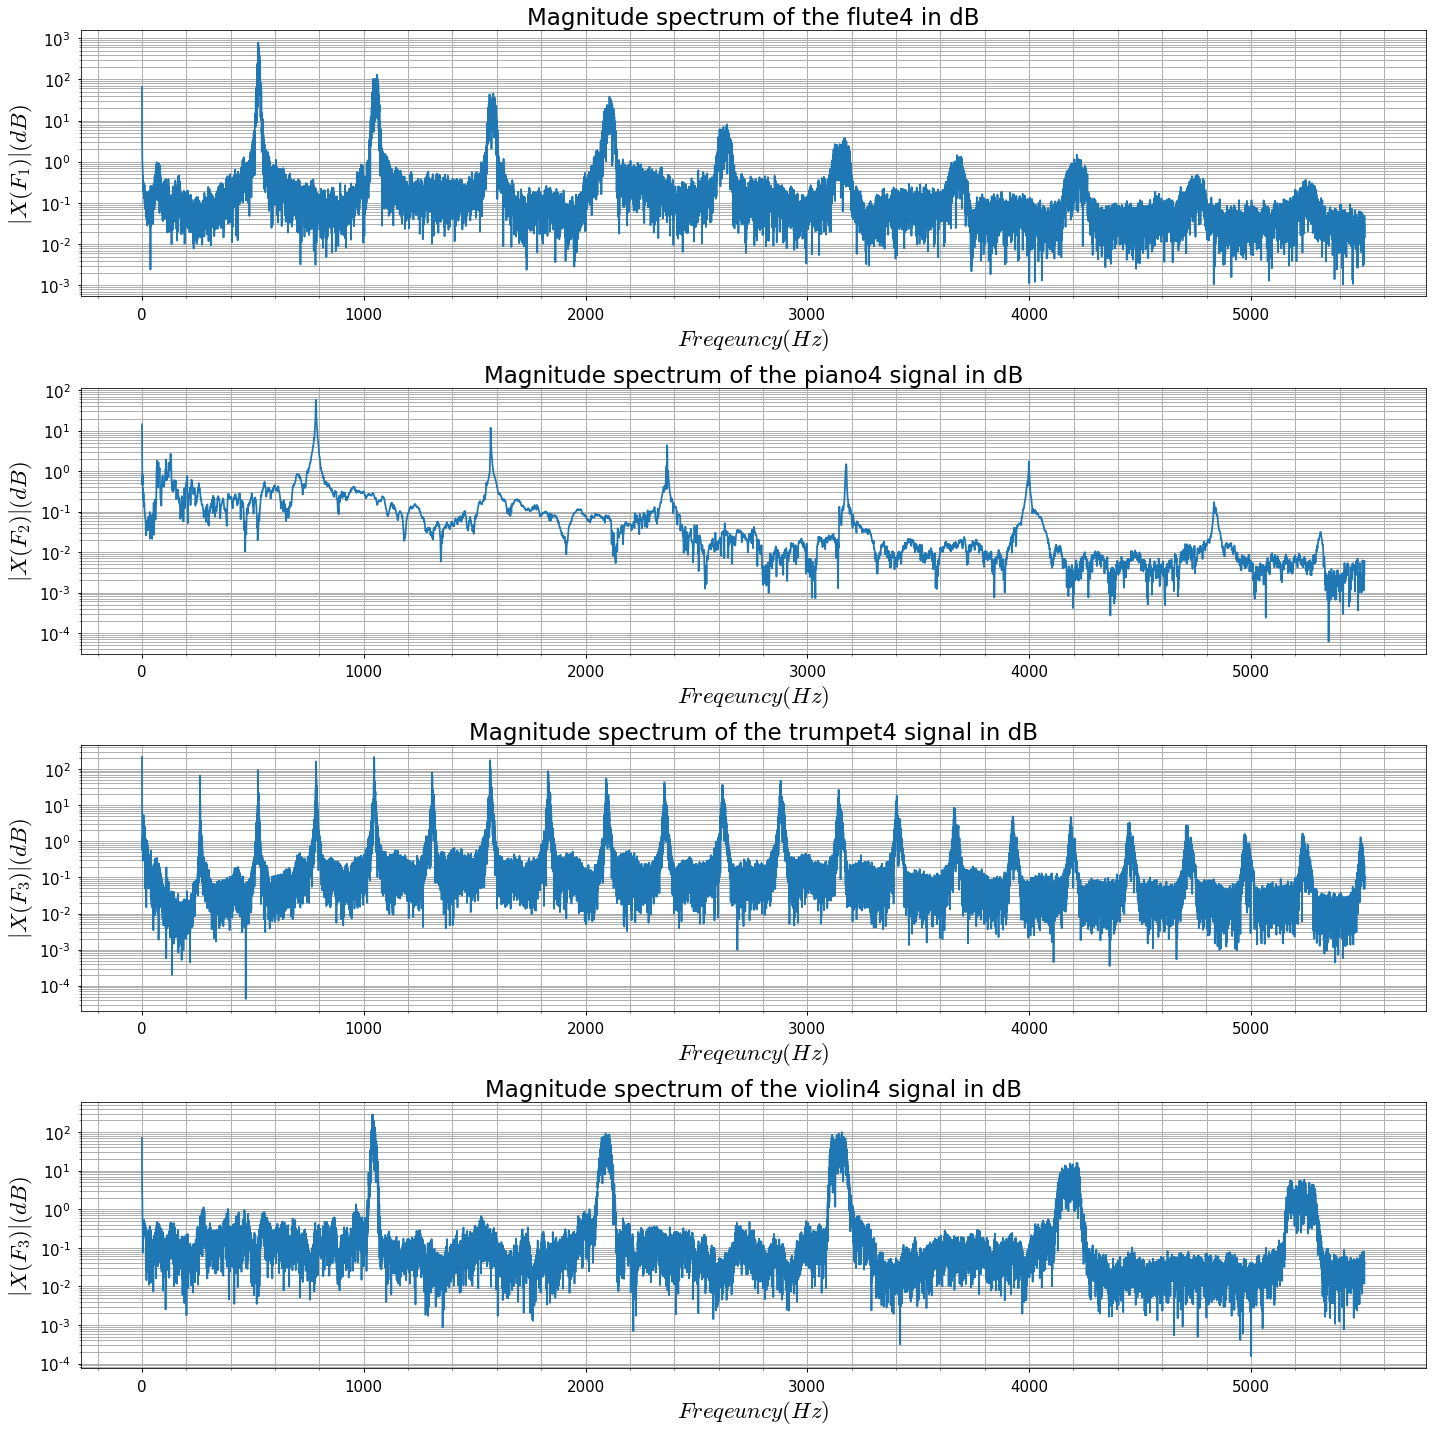

In [30]:
title = ['Magnitude spectrum of the flute4 in dB','Magnitude spectrum of the piano4 signal in dB','Magnitude spectrum of the trumpet4 signal in dB','Magnitude spectrum of the violin4 signal in dB']
fig, axs = plt.subplots(4, figsize=(20,20))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    axs[row].semilogy(x, y)
    axs[row].set_title(title[row], fontsize = 23)
    axs[row].set_xlabel(xaxis_label, fontsize = 23)
    axs[row].set_ylabel(yaxis_label, fontsize = 23)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(frequency_1, ms_1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_1)|(dB)$', row=0)
plot_signal(frequency_2, ms_2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_2)|(dB)$', row=1)
plot_signal(frequency_3, ms_3, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|(dB)$', row=2)
plot_signal(frequency_4, ms_4, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F_3)|(dB)$', row=3)
fig.savefig('fig1.png')

In [8]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

fundamental_frequency_1 = find_ff(track1, Fs1)
fundamental_frequency_2 = find_ff(track2, Fs2)
fundamental_frequency_3 = find_ff(track3, Fs3)
fundamental_frequency_4 = find_ff(track4, Fs4)

print('The Fundamental frequency of the flute4 audio signal: {} Hz'.format(fundamental_frequency_1))
print('The Fundamental frequency of the piano4 audio signal: {} Hz'.format(fundamental_frequency_2))
print('The Fundamental frequency of the trumpet4 audio signal: {} Hz'.format(fundamental_frequency_3))
print('The Fundamental frequency of the violin4 audio signal: {} Hz'.format(fundamental_frequency_4))

The Fundamental frequency of the flute4 audio signal: 518.1 Hz
The Fundamental frequency of the piano4 audio signal: 776.1600000000001 Hz
The Fundamental frequency of the trumpet4 audio signal: 261.6553210273805 Hz
The Fundamental frequency of the violin4 audio signal: 1027.8 Hz


Part 2:

In [9]:
Fs_1, track_1 = wavfile.read('piano4.wav')
Fs_2, track_2 = wavfile.read('flute1.wav')
Fs_3, track_3 = wavfile.read('flute2.wav')
Fs_4, track_4 = wavfile.read('flute3.wav')
Fs_5, track_5 = wavfile.read('flute4.wav')

track_1 = track_1/32767.0
track_2 = track_2/32767.0
track_3 = track_3/32767.0
track_4 = track_4/32767.0
track_5 = track_5/32767.0

def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_1 = find_ff(track_1, Fs_1)
ff_2 = find_ff(track_2, Fs_2)
ff_3 = find_ff(track_3, Fs_3)
ff_4 = find_ff(track_4, Fs_4)
ff_5 = find_ff(track_5, Fs_5)

print('The Fundamental frequency of the piano4 audio signal: {} Hz'.format(ff_1))
print('The Fundamental frequency of the flute1 audio signal: {} Hz'.format(ff_2))
print('The Fundamental frequency of the flute2 audio signal: {} Hz'.format(ff_3))
print('The Fundamental frequency of the flute3 audio signal: {} Hz'.format(ff_4))
print('The Fundamental frequency of the flute4 audio signal: {} Hz'.format(ff_5))


The Fundamental frequency of the piano4 audio signal: 776.1600000000001 Hz
The Fundamental frequency of the flute1 audio signal: 1034.7 Hz
The Fundamental frequency of the flute2 audio signal: 256.69241379310347 Hz
The Fundamental frequency of the flute3 audio signal: 775.4496644295302 Hz
The Fundamental frequency of the flute4 audio signal: 518.1 Hz


Thus, from the above observation we notice $\beta = 3$ <br> i.e., the required $\beta$ value for the $flute\beta.wav$ which is closest to my $piano\alpha.wav$ in terms of the fundamental frequency is 3.

# **Problem** **2**. <br>
Part1 :


In [10]:
sampling_rate, whistle_track = wavfile.read('Whistle.wav')
whistle_track0 = whistle_track[:, 0] #choosing channel 0
whistle_track0 = whistle_track0/32767.0
print('Sampling rate: {}Hz'.format(sampling_rate))
display(Audio(data=whistle_track0, rate=sampling_rate))
print('Size of the recorded audio signal: {}'.format(whistle_track.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal: (147456, 2)


Part 2:

In [11]:
def spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X

freq, mag_spect = spec(whistle_track0, sampling_rate, sampling_rate/2)



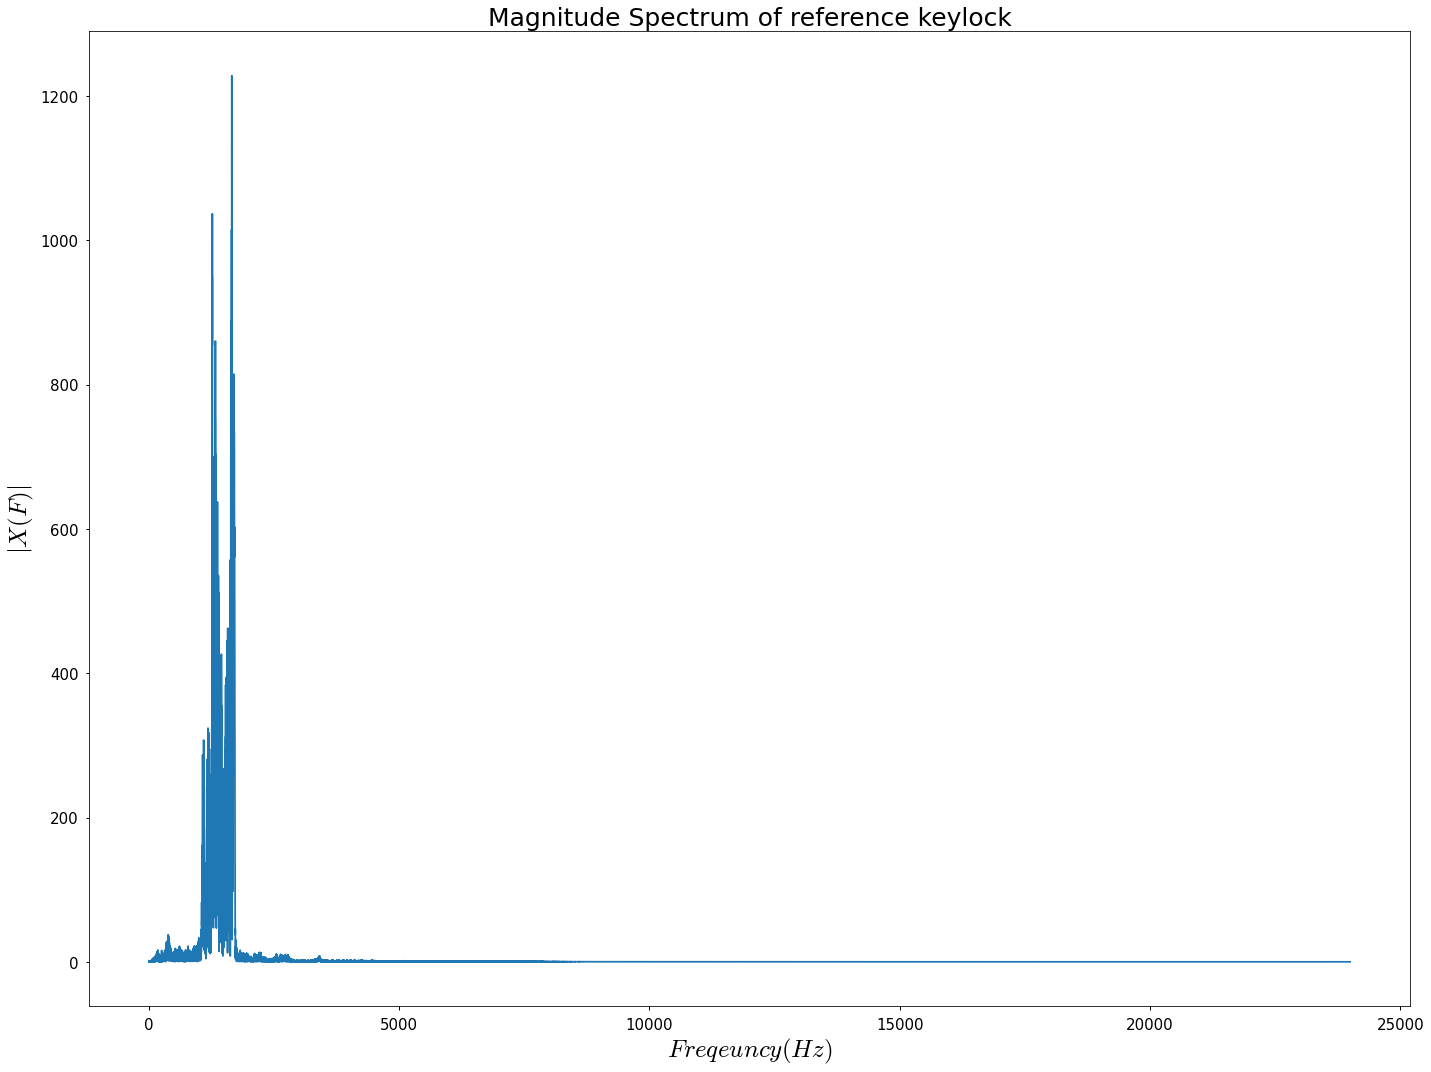

In [12]:
fig, axs = plt.subplots(figsize=(20,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y)
    axs.set_title('Magnitude Spectrum of reference keylock', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

plot_signal(freq, mag_spect, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$')
fig.savefig('fig4.png')


In [13]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

fundamental_frequency = find_ff(whistle_track0, sampling_rate)
print('The Fundamental frequency of the password: {} Hz'.format(fundamental_frequency))


The Fundamental frequency of the password: 1062.1744791666667 Hz


Part 3:

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

Test-Case 1:

In [ ]:
audio, sr = get_audio()

In [ ]:
wavfile.write('recording.wav', sr, audio)

In [14]:
fs1, recording_track1 = wavfile.read('recording.wav')
recording_track1 = recording_track1/32767.0
print('Sampling rate: {}Hz'.format(fs1))
display(Audio(data=recording_track1, rate=fs1))
print('Size of the recorded audio signal 1: {}'.format(recording_track1.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal 1: (167040,)


Test-Case 2:

In [ ]:
audio1, sr1 = get_audio()

In [ ]:
wavfile.write('recording1.wav', sr1, audio1)

In [15]:
fs2, recording_track2 = wavfile.read('recording1.wav')
recording_track2 = recording_track2/32767.0
print('Sampling rate: {}Hz'.format(fs2))
display(Audio(data=recording_track2, rate=fs2))
print('Size of the recorded audio signal 2: {}'.format(recording_track2.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal 2: (172800,)


Test-Case 3:

In [ ]:
audio2, sr2 = get_audio()

In [ ]:
wavfile.write('recording2.wav', sr2, audio2)

In [16]:
fs3, recording_track3 = wavfile.read('recording2.wav')
recording_track3 = recording_track3/32767.0
print('Sampling rate: {}Hz'.format(fs3))
display(Audio(data=recording_track3, rate=fs3))
print('Size of the recorded audio signal 3: {}'.format(recording_track3.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal 3: (181440,)


Test-Case 4:

In [ ]:
audio3, sr3 = get_audio()

In [ ]:
wavfile.write('recording3.wav', sr3, audio3)

In [17]:
fs4, recording_track4 = wavfile.read('recording3.wav')
recording_track4 = recording_track4/32767.0
print('Sampling rate: {}Hz'.format(fs4))
display(Audio(data=recording_track4, rate=fs4))
print('Size of the recorded audio signal 4: {}'.format(recording_track4.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal 4: (164160,)


Test-case 5:

In [ ]:
audio4, sr4 = get_audio()

In [ ]:
wavfile.write('recording4.wav', sr4, audio4)

In [18]:
fs5, recording_track5 = wavfile.read('recording4.wav')
recording_track5 = recording_track5/32767.0
print('Sampling rate: {}Hz'.format(fs5))
display(Audio(data=recording_track5, rate=fs5))
print('Size of the recorded audio signal 5: {}'.format(recording_track5.shape))

Sampling rate: 48000Hz


Size of the recorded audio signal 5: (144000,)


In [19]:
#Function to pick fundamental frequency peak from yeach test-case
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK))[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff1 = find_ff(recording_track1, fs1)
print('The Fundamental frequency of the recording 1: {} Hz'.format(ff1))
ff2 = find_ff(recording_track2, fs2)
print('The Fundamental frequency of the recording 2: {} Hz'.format(ff2))
ff3 = find_ff(recording_track3, fs3)
print('The Fundamental frequency of the recording 3: {} Hz'.format(ff3))
ff4 = find_ff(recording_track4, fs4)
print('The Fundamental frequency of the recording 4: {} Hz'.format(ff4))
ff5 = find_ff(recording_track5, fs5)
print('The Fundamental frequency of the recording 5: {} Hz'.format(ff5))

The Fundamental frequency of the recording 1: 1052.8735632183907 Hz
The Fundamental frequency of the recording 2: 1249.1666666666665 Hz
The Fundamental frequency of the recording 3: 1117.4603174603174 Hz
The Fundamental frequency of the recording 4: 787.4269005847952 Hz
The Fundamental frequency of the recording 5: 1088.6666666666665 Hz


In [20]:
#Function to check if keylock access is granted or denied
upper_limit = fundamental_frequency*1.05
lower_limit = fundamental_frequency*0.95

frequencies = [ff1,ff2,ff3,ff4,ff5]

for i in range(len(frequencies)):
  print('The Fundamental frequency of the recording {0}: {1} Hz'.format(i+1, frequencies[i]))
  if frequencies[i]<=upper_limit and frequencies[i]>=lower_limit:
    print("ACCESS GRANTED")
  else:
    print("ACCESS DENIED")



The Fundamental frequency of the recording 1: 1052.8735632183907 Hz
ACCESS GRANTED
The Fundamental frequency of the recording 2: 1249.1666666666665 Hz
ACCESS DENIED
The Fundamental frequency of the recording 3: 1117.4603174603174 Hz
ACCESS DENIED
The Fundamental frequency of the recording 4: 787.4269005847952 Hz
ACCESS DENIED
The Fundamental frequency of the recording 5: 1088.6666666666665 Hz
ACCESS GRANTED


Part 4:

In [21]:
def spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X

f1, ms1 = spec(recording_track1, fs1, fs1/2)
f2, ms2 = spec(recording_track2, fs2, fs2/2)
f3, ms3 = spec(recording_track3, fs3, fs3/2)
f4, ms4 = spec(recording_track4, fs4, fs4/2)
f5, ms5 = spec(recording_track5, fs5, fs5/2)

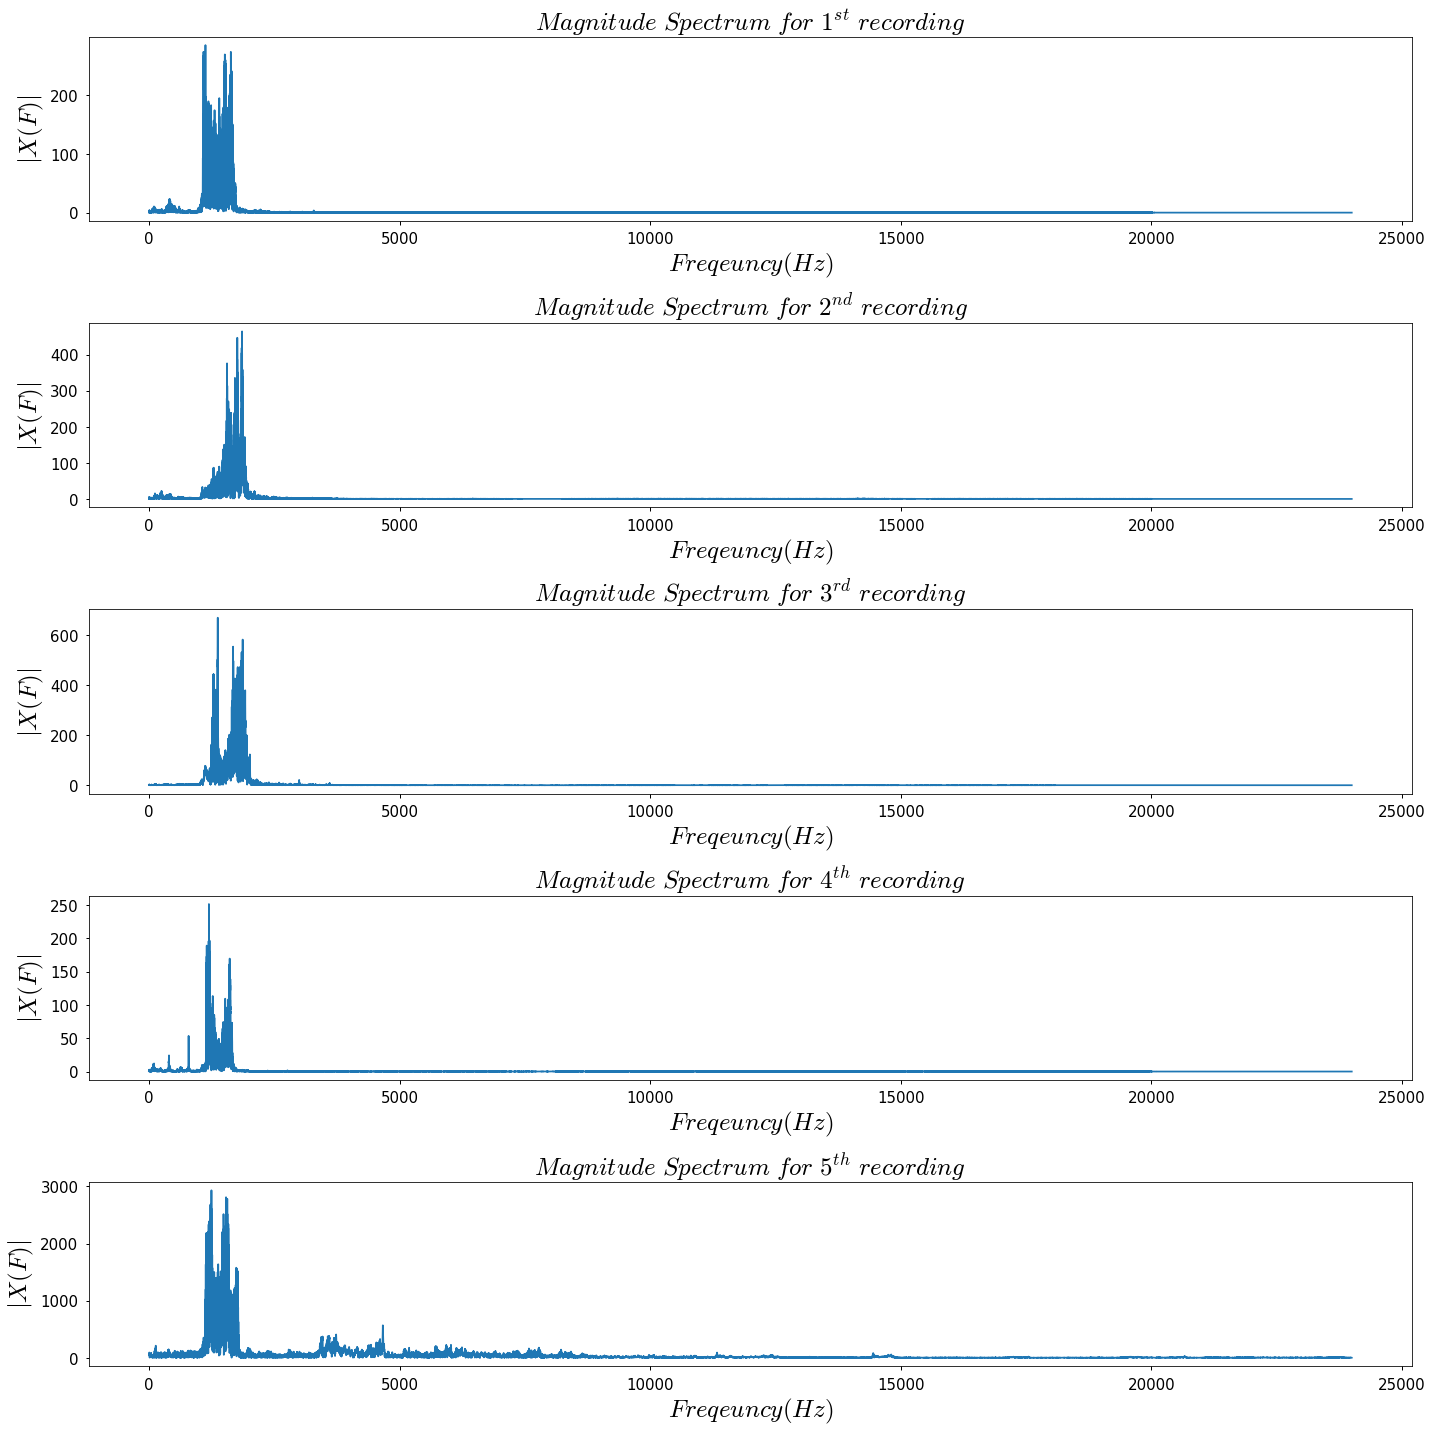

In [24]:
title_i= ['$Magnitude\ Spectrum\ for\ 1^{st}\ recording$',
          '$Magnitude\ Spectrum\ for\ 2^{nd}\ recording$',
          '$Magnitude\ Spectrum\ for\ 3^{rd}\ recording$',
          '$Magnitude\ Spectrum\ for\ 4^{th}\ recording$',
          '$Magnitude\ Spectrum\ for\ 5^{th}\ recording$',]
fig, axs = plt.subplots(5, figsize=(20,20))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

plot_signal(f1, ms1, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=0)
plot_signal(f2, ms2, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=1)
plot_signal(f3, ms3, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=2)
plot_signal(f4, ms4, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=3)
plot_signal(f5, ms5, xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=4)
fig.savefig('fig5.png')

# **Problem** **3**. <br>

In [25]:
F_s, opera_track = wavfile.read('Opera.wav')
opera_track = opera_track/32767.0
print('Sampling rate: {}Hz'.format(F_s))
display(Audio(data=opera_track, rate=F_s))
print('Size of the Opera audio signal: {}'.format(opera_track.shape))

Sampling rate: 44100Hz


Size of the Opera audio signal: (220500,)


In [26]:
def spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    return N, X

frequency = []
spectrum = []
arr = []

start_point = 0
end_point = 0
temp = int(opera_track.shape[0]/ 10)


for i in range(10):
  end_point += temp
  arr.append(opera_track[start_point : end_point])
  start_point = end_point + 1

for j in range(10):
  temp1, temp2 = spec(arr[j], F_s, F_s/2)
  frequency.append(temp1)
  spectrum.append(temp2)


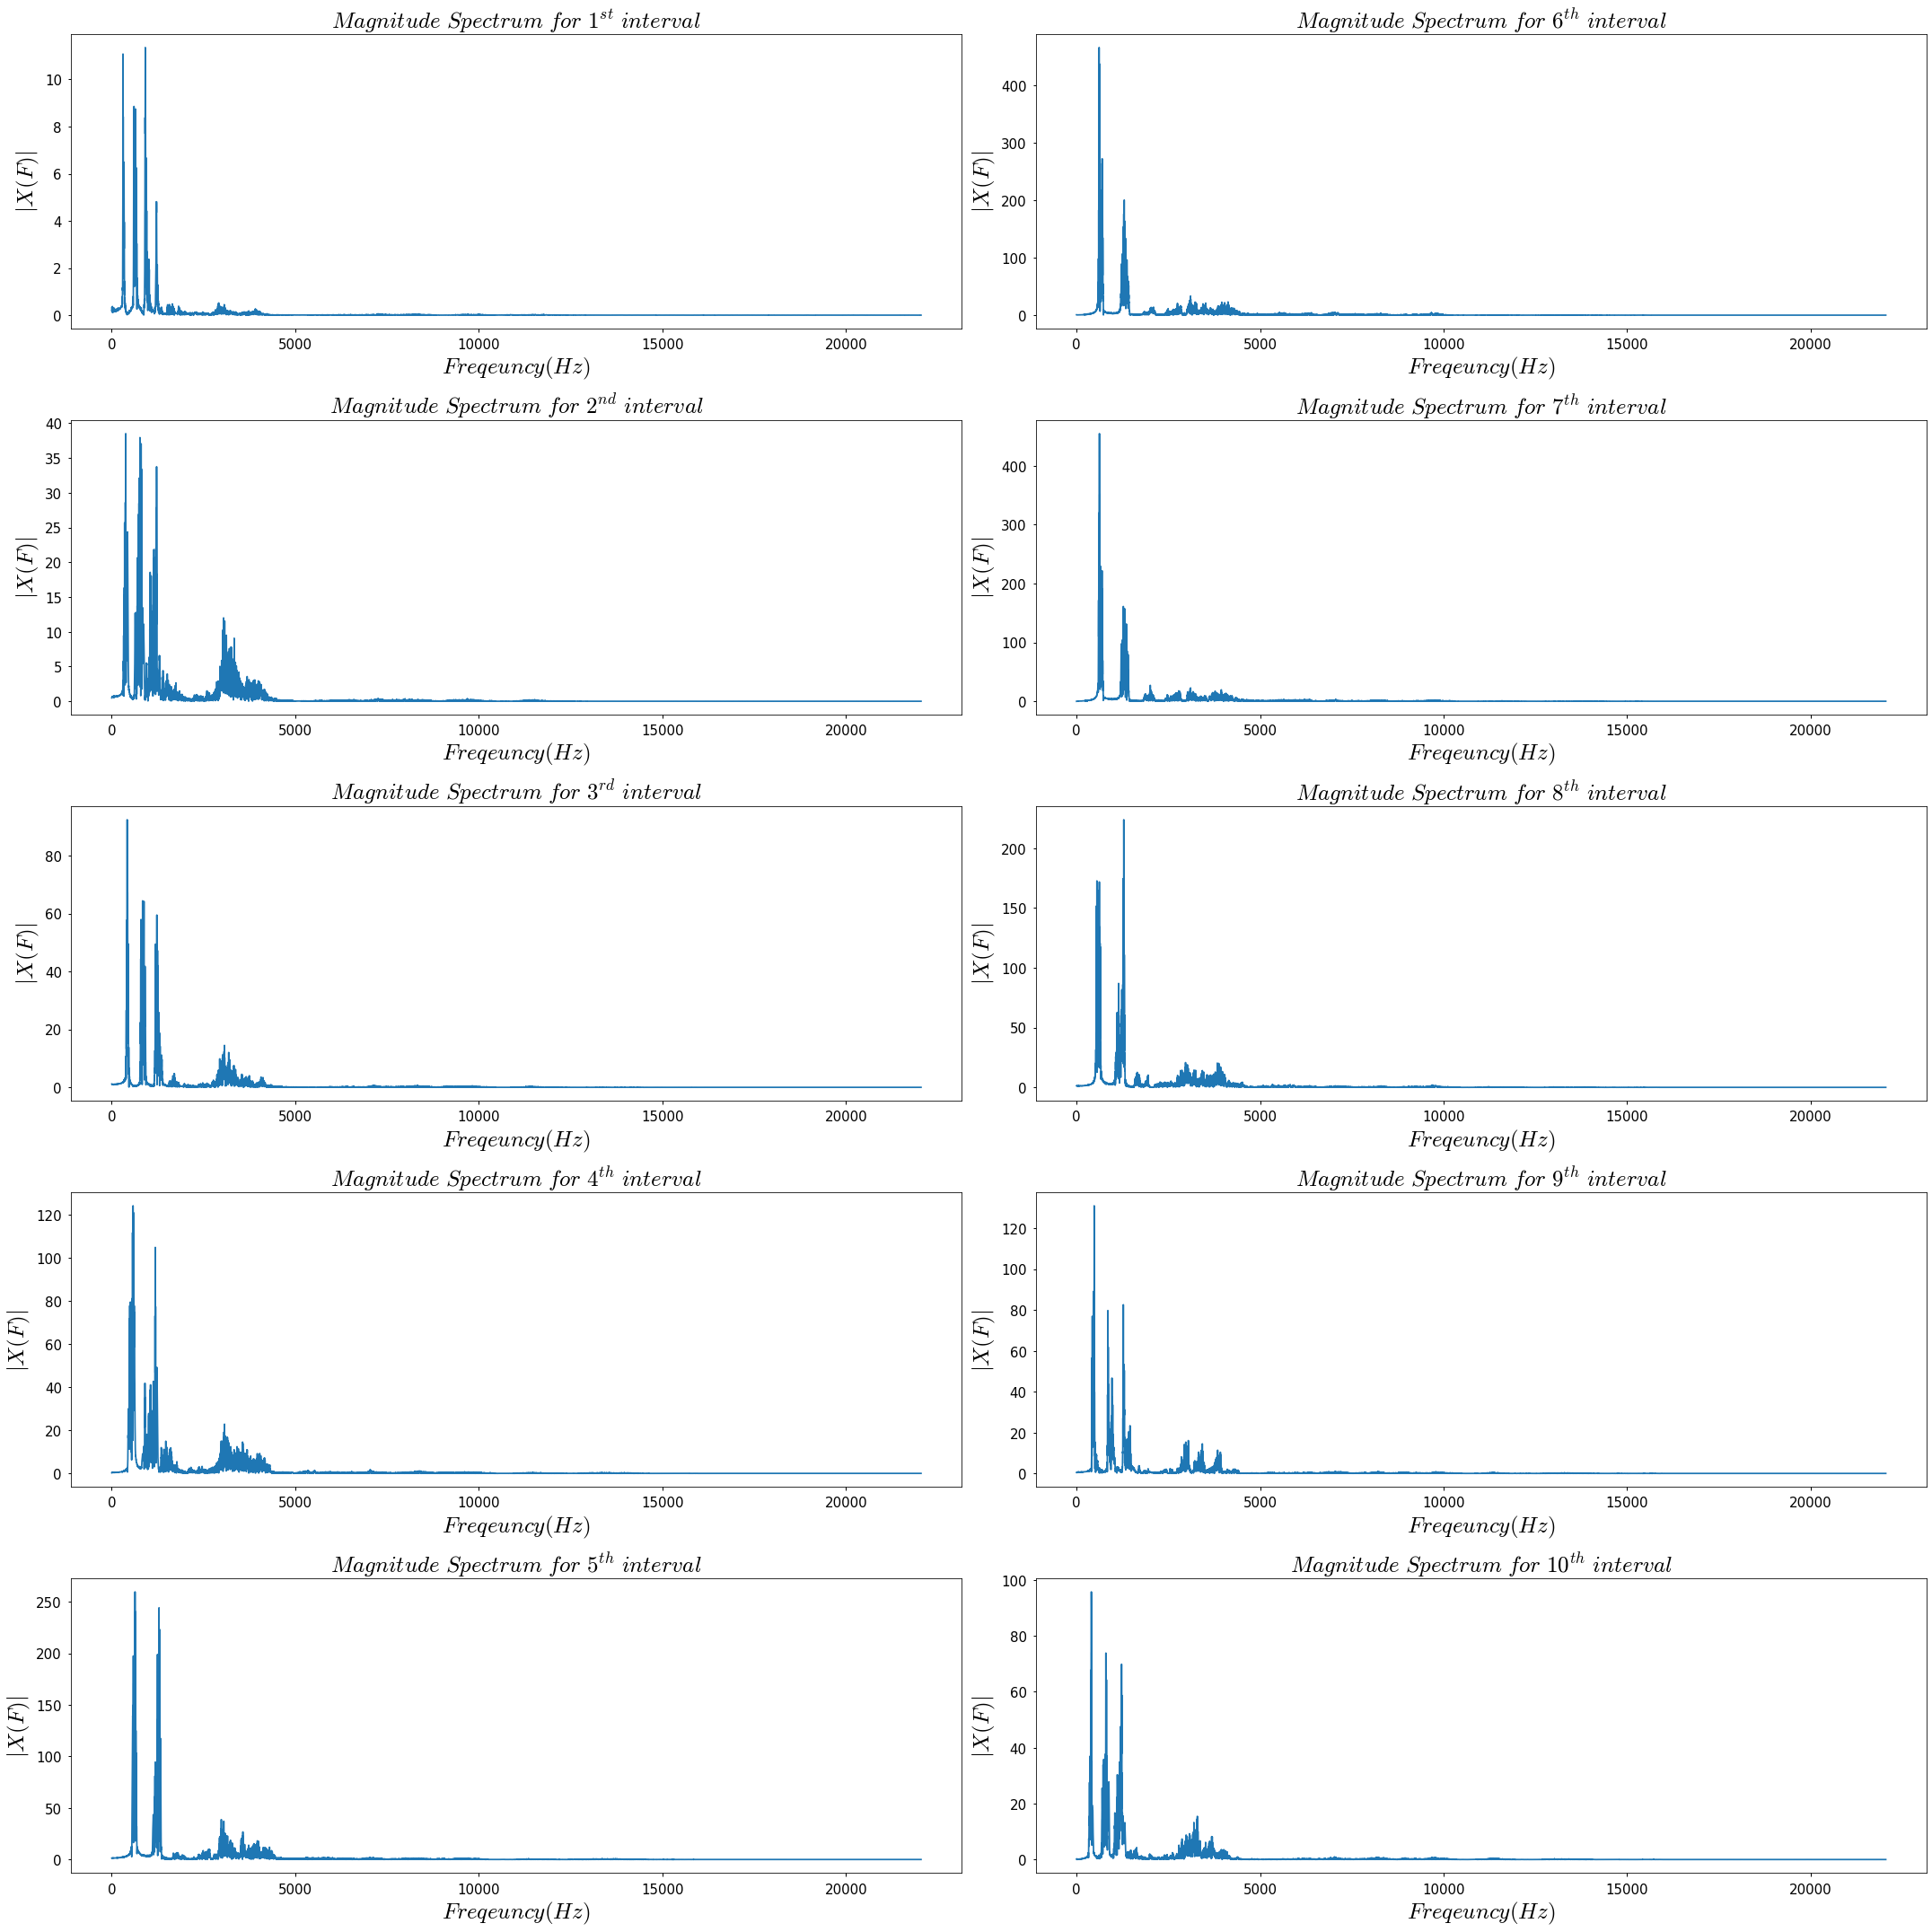

In [28]:
title_s= ['$Magnitude\ Spectrum\ for\ 1^{st}\ interval$',
          '$Magnitude\ Spectrum\ for\ 2^{nd}\ interval$',
          '$Magnitude\ Spectrum\ for\ 3^{rd}\ interval$',
          '$Magnitude\ Spectrum\ for\ 4^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 5^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 6^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 7^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 8^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 9^{th}\ interval$',
          '$Magnitude\ Spectrum\ for\ 10^{th}\ interval$']
fig, axs = plt.subplots(5,2, figsize=(30,30))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None, column=None, legend=None):  
    axs[row,column].plot(x, y)
    axs[row,column].set_title(title_s[legend], fontsize = 25)
    axs[row,column].set_xlabel(xaxis_label, fontsize = 25)
    axs[row,column].set_ylabel(yaxis_label, fontsize = 25)
    axs[row,column].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

for j in range(10):
  if (j<5):
    plot_signal(frequency[j], spectrum[j], xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=j, column=0, legend=j)
  else:
    plot_signal(frequency[j], spectrum[j], xaxis_label=r'$Freqeuncy(Hz)$', yaxis_label=r'$|X(F)|$', row=j-5, column=1, legend=j)   

fig.savefig('fig3.png')